# 1. Logistic regression for binary classification from scratch

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from utils import *

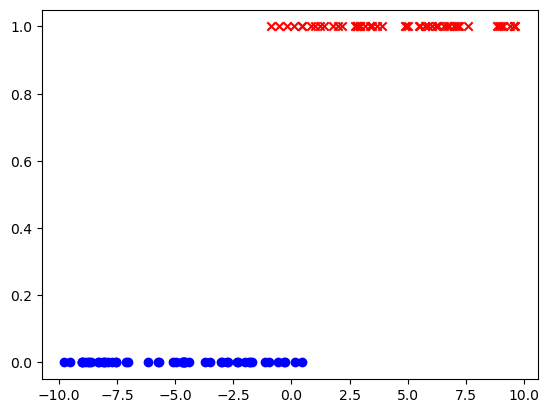

In [2]:
x_train = generate_univariate_x(100)
y_train = generate_binary_y(100)
plt_binary_classification(x_train, y_train)
plt.show()

In [3]:
w_init, b_init = 0, 0
iterations = 10000
alpha = 1.0e-2

w_final, b_final, J_hist = gradient_descent_logistic(x_train, y_train, w_init, b_init, compute_cost_logistic, compute_gradient_logistic ,alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost     0.64
Iteration  1000: Cost     0.11
Iteration  2000: Cost     0.10
Iteration  3000: Cost     0.10
Iteration  4000: Cost     0.10
Iteration  5000: Cost     0.10
Iteration  6000: Cost     0.10
Iteration  7000: Cost     0.09
Iteration  8000: Cost     0.09
Iteration  9000: Cost     0.09
(w,b) found by gradient descent: (  1.9769,  0.3296)


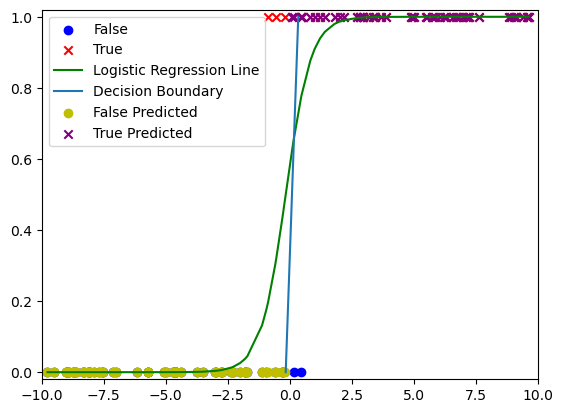

In [4]:
y_predicted = sigmoid(x_train * w_final + b_final)
plt_binary_classification(x_train, y_train)
plt.plot(x_train, y_predicted, 'g-')
x_intersect_1 = -b_final / w_final
x_intersect_2 = (1 - b_final) / w_final
plt.plot([x_intersect_1, x_intersect_2], [0, 1])

y_predicted[y_predicted < 0.5] = 0
y_predicted[y_predicted >= 0.5] = 1
plt.scatter(x_train[y_predicted == 0], y_predicted[y_predicted == 0], marker='o', c='y')
plt.scatter(x_train[y_predicted == 1], y_predicted[y_predicted == 1], marker='x', c='purple')

plt.axis([-10, 10, -0.02, 1.02])
plt.legend(['False', 'True', 'Logistic Regression Line', 'Decision Boundary', 'False Predicted', 'True Predicted' ])
plt.show()

In [5]:
f1 = f1_score(y_train, y_predicted)
accuracy = accuracy_score(y_train, y_predicted)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")
print(f"Cost: {J_hist[-1]:8.4f}")

f1 score:   0.9485
accuracy:   0.9500
Cost:   0.0945


# 2 Using sklearn

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [7]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train.reshape(-1, 1), y_train)
w_final = logistic_model.coef_[0][0]
b_final = logistic_model.intercept_[0]
print(f"(w,b) found by sklearn: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by sklearn: (  1.5429,  0.2822)


In [8]:
y_predicted = sigmoid(x_train * w_final + b_final)
y_predicted[y_predicted < 0.5] = 0
y_predicted[y_predicted >= 0.5] = 1
f1 = f1_score(y_train, y_predicted)
accuracy = accuracy_score(y_train, y_predicted)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")
print(f"Cost: {log_loss(y_train, y_predicted):8.4f}")

f1 score:   0.9485
accuracy:   0.9500
Cost:   1.7270
